In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X=iris.data
Y=iris.target

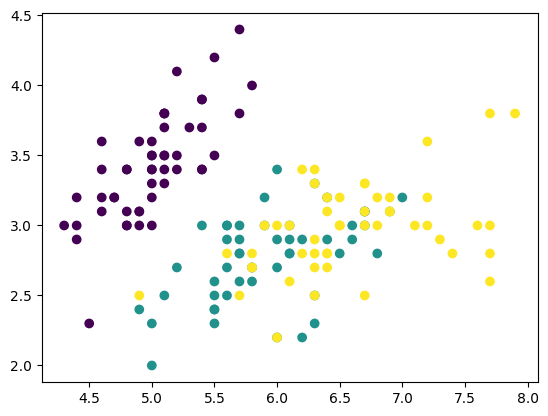

In [ ]:

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=7)
kmeans2.fit(X)

KMeans(n_clusters=2, random_state=7)

In [ ]:
kmeans3= KMeans(n_clusters=3, random_state=7)
kmeans3.fit(X)

KMeans(n_clusters=3, random_state=7)

In [ ]:
kmeans4= KMeans(n_clusters=4, random_state=7)
kmeans4.fit(X)

KMeans(n_clusters=4, random_state=7)

In [ ]:
kmeans5= KMeans(n_clusters=5, random_state=7)
kmeans5.fit(X)

KMeans(n_clusters=5, random_state=7)

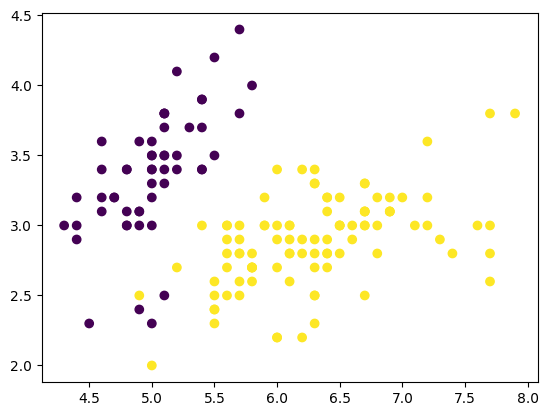

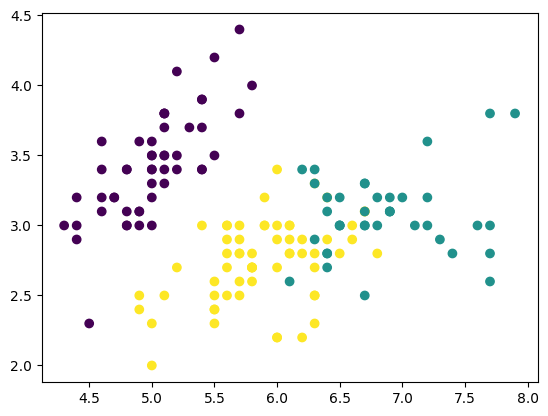

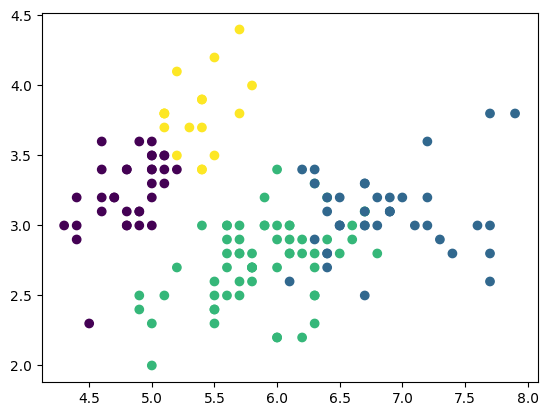

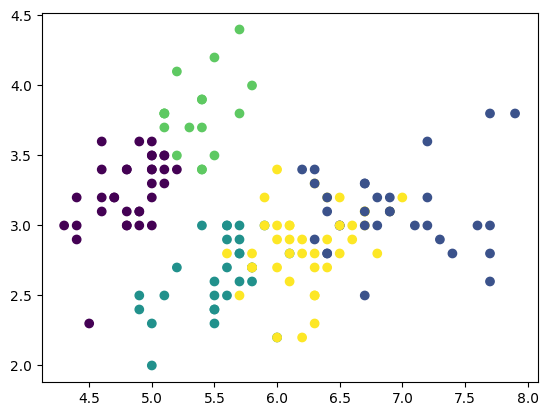

Silhoueette_score [0.6810461692117462, 0.551191604619592, 0.4089860717743068, 0.3679022317137866]


In [ ]:
kmeans=[kmeans2,kmeans3,kmeans4,kmeans5]
silhouette=[]
from sklearn.metrics import silhouette_score
for i in range(4):
    plt.scatter(X[:,0],X[:,1],c=kmeans[i].labels_)
    plt.show()
    score =silhouette_score(X,kmeans[i].labels_, metric='euclidean')
    silhouette.append(score)

   # print("les centres:" ,kmeans[i].cluster_centers_)
print(f"Silhoueette_score",silhouette)

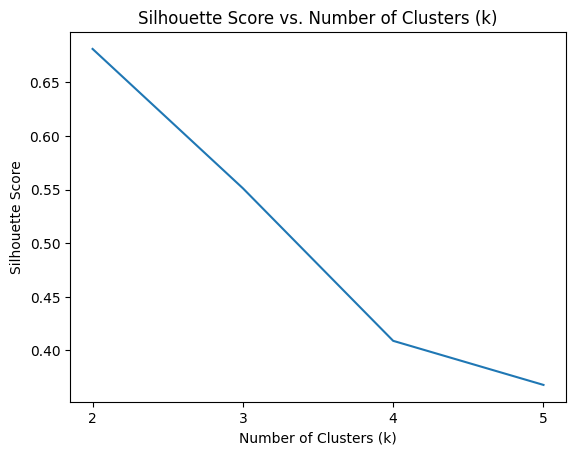

In [ ]:
k=[2,3,4,5]
plt.plot(k,silhouette)
plt.title("Silhouette Score vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k)
plt.show()

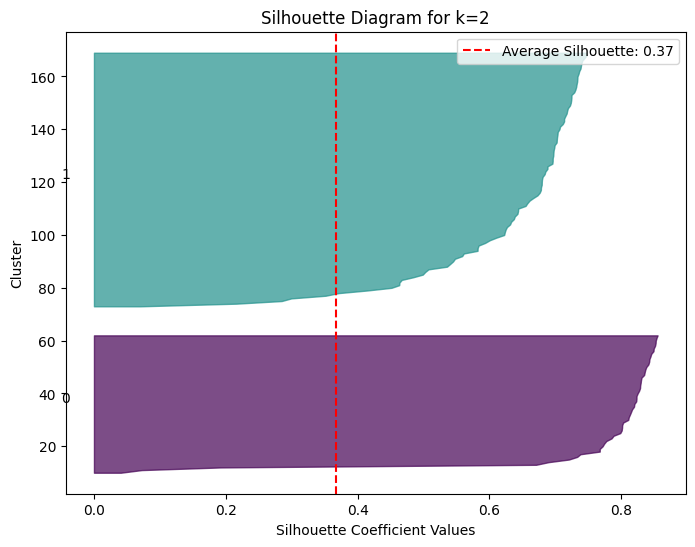

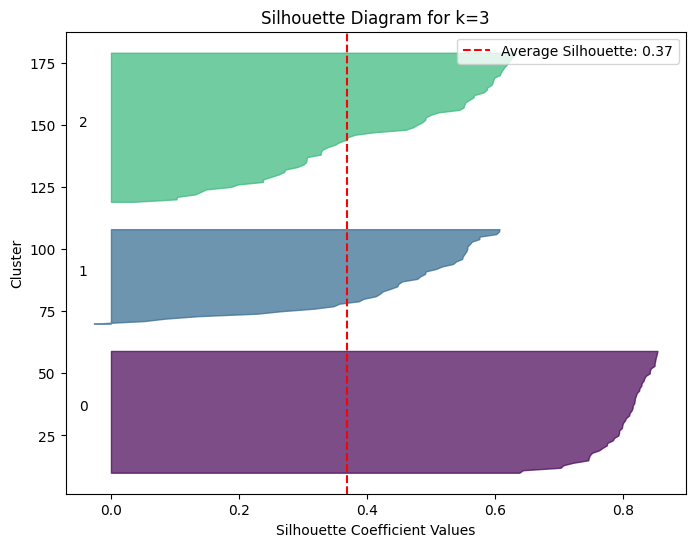

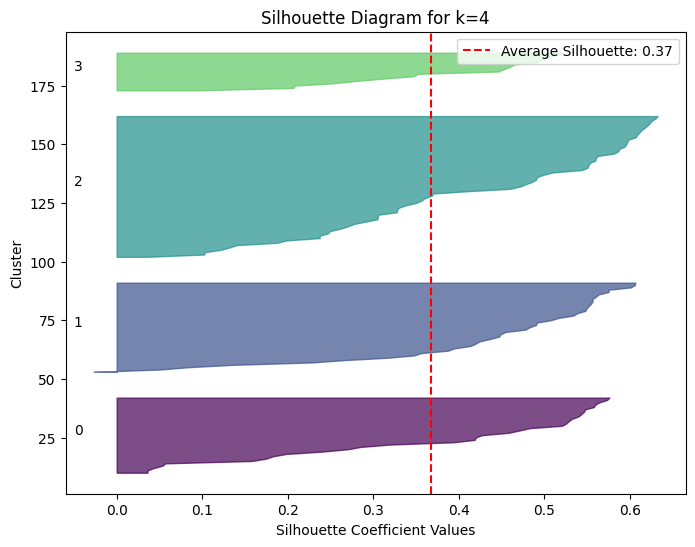

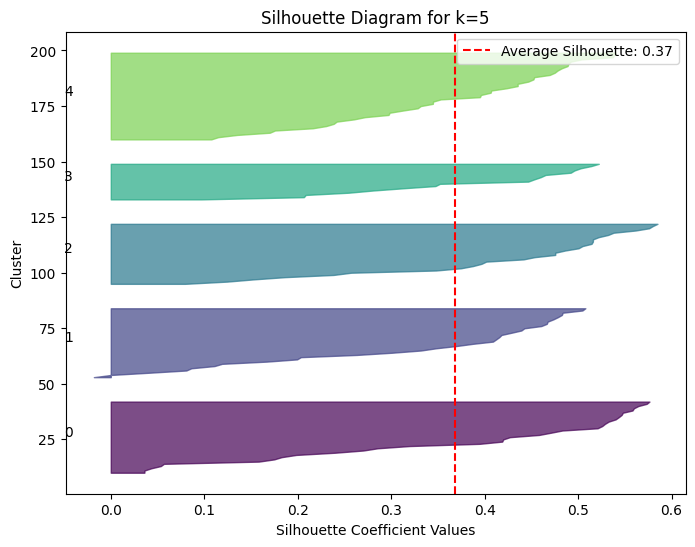

Silhouette Scores: []


In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# List of KMeans models for k = 2, 3, 4, 5
kmeans = [kmeans2, kmeans3, kmeans4, kmeans5]
silhouette = []

for i in range(len(kmeans)):

    # Silhouette Diagram
    silhouette_vals = silhouette_samples(X, kmeans[i].labels_)
    y_lower = 10

    plt.figure(figsize=(8, 6))
    for j in range(i + 2):  # Iterate through clusters
        cluster_vals = silhouette_vals[kmeans[i].labels_ == j]
        cluster_vals.sort()
        size_cluster_j = len(cluster_vals)
        y_upper = y_lower + size_cluster_j
        color = cm.viridis(float(j) / (i + 2))
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.axvline(x=score, color="red", linestyle="--", label=f"Average Silhouette: {score:.2f}")
    plt.title(f"Silhouette Diagram for k={i+2}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.legend()
    plt.show()

# Print all silhouette scores
print(f"Silhouette Scores: {silhouette}")

